# Introduction
La transition énergétique et la gestion de l'énergie représentent des enjeux sociétaux et actuels. 

Par ailleurs, la transition numérique, les nouvelles technologies et la science des données constituent des leviers pour relever ces défis. 



### Références
J'ai trouvé le jeu de données sur kaggle : https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset

"the output of a solar power system installed in Berkeley, CA"

https://www.youtube.com/watch?v=jCYjcEaNfzc&list=PLXf2gx1SC6EI2QYKjekXc4AvaReogmW8X

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

## Import the data

In [3]:
#Import and modify the data
FILE = "sol_pow_gen.csv"
data = pd.read_csv(FILE)

print(data.shape)

#As we dont have a column with standard date type values (Year, month, day and hour are all separated into different columns), we want to create a column of dates with the right format
#Double brackets here data[["Year", "Month", "Day"]] to make a data frame
data.insert(5, "datetime", pd.to_datetime(data[["Year", "Month", "Day"]]) + pd.to_timedelta(data["First Hour of Period"], unit="h"))

#The columns Year, Month, Day and First Hour are no longer needed and are redundant
data = data.drop(["Year", "Month", "Day", "First Hour of Period"], axis=1)

#We want degrees celsius not F
data["Average Temperature (Day)"] = round((data["Average Temperature (Day)"] - 32) * (5/9), 2)

#The resulting dataset
data.head()

(2920, 16)


,Day of Year,datetime,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008-09-01 01:00:00,False,0.859897,20.56,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008-09-01 04:00:00,False,0.628535,20.56,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008-09-01 07:00:00,True,0.397172,20.56,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008-09-01 10:00:00,True,0.165810,20.56,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008-09-01 13:00:00,True,0.065553,20.56,28,7.5,0,10.0,21,3.0,29.89,30069


## Data description/visualization

The data variables : 

Distance to Solar Noon : distance to the sun at noon (supposedly normalized around 1)

Average Temperature (Day) : the average temperature in the day (previously in °F, converted in °C)

Average Wind Direction (Day) : average direction of the wind // discrete "qualitative" variable with 36 modalities (36 directions possible)

Average Wind Speed (Day) : average wind speed (supposedly in km/h) // continuous quantitative

Sky Cover : sky coverage by clouds // qualitative variable with 5 modalities (0 is no coverage, 4 is a lot of coverage)

Relative Humidity : humidity of the day // quantitative variable, on a scale of 0 to 100%

Power Generated : power generated by the power plant in kW in the day // dependent variable, quantitative

In [4]:
#We can check that the data types are all convenient here
data.dtypes

Day of Year                                      int64
datetime                                datetime64[ns]
Is Daylight                                       bool
Distance to Solar Noon                         float64
Average Temperature (Day)                      float64
Average Wind Direction (Day)                     int64
Average Wind Speed (Day)                       float64
Sky Cover                                        int64
Visibility                                     float64
Relative Humidity                                int64
Average Wind Speed (Period)                    float64
Average Barometric Pressure (Period)           float64
Power Generated                                  int64
dtype: object

In [5]:
#Let's explore the data with .describe()
data.describe()

,Day of Year,datetime,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
count,2920.000000,2920,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,183.334247,2009-03-02 11:30:00,0.503294,14.704877,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
min,1.000000,2008-09-01 01:00:00,0.050401,5.560000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,92.000000,2008-12-01 06:15:00,0.243714,11.670000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,183.000000,2009-03-02 11:30:00,0.478957,15.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,275.000000,2009-06-01 16:45:00,0.739528,17.220000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,366.000000,2009-08-31 22:00:00,1.141361,25.560000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000
std,105.769919,NaN,0.298024,3.800963,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413


In [6]:
#Getting the full range of times
date_range = pd.date_range(start = "2008-09-01 01:00:00", end = "2009-08-31 22:00:00", freq="3h")

#Checking if this corresponds to our data => no error messages means we are good to go
assert (date_range == data["datetime"]).all()

#Checking if we have duplicates
print(f"Number of duplicates in the data: {data.duplicated().sum()}")

#Checking for missing value
print(f"Number of missing values in the data: {data.isna().sum().sum()}")

Number of duplicates in the data: 0
Number of missing values in the data: 1


First of all, we want to visualize some of the variables like the distance to solar noon, avg temperature, avg wind direction, pressur etc ; in order to get an idea of the weather at the particular place this data was collected.

We also would like to get an idea of the power generated.

### Distance to solar noon

Text(0, 0.5, 'Distance')

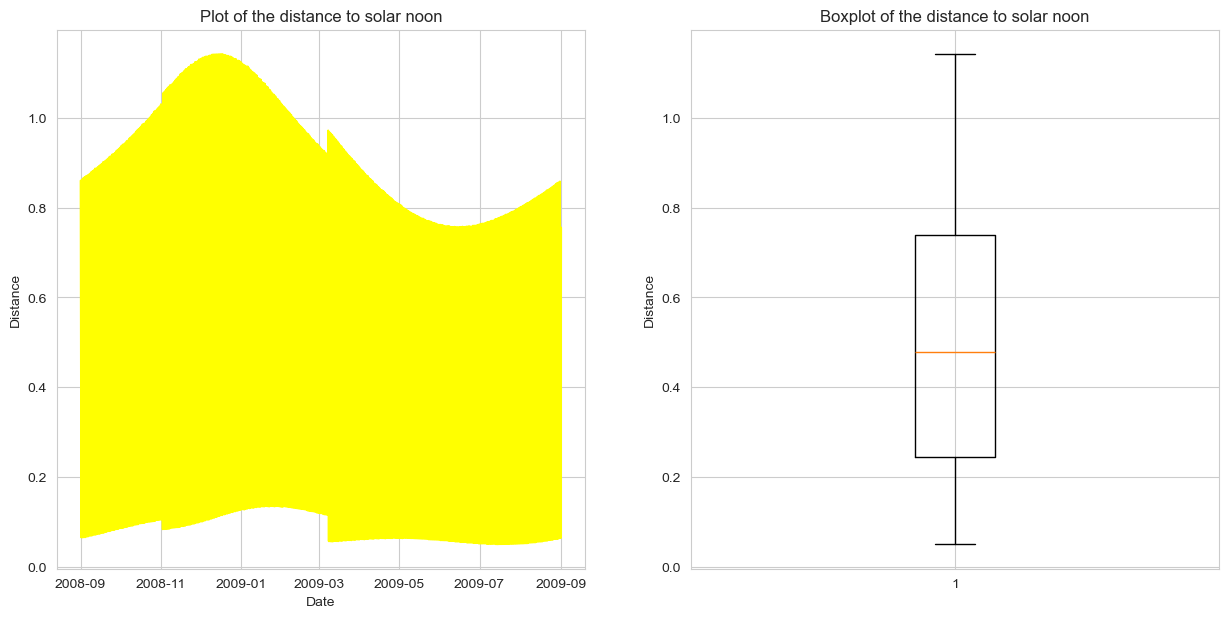

In [7]:
#Graph and boxplot for the variable distance so solar noon
dist_sol = data["Distance to Solar Noon"]

fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(date_range, dist_sol, color = "yellow")     #this is a little weird at first glance
ax[0].set_title("Plot of the distance to solar noon")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Distance")

ax[1].boxplot(dist_sol)
ax[1].set_title("Boxplot of the distance to solar noon")
ax[1].set_xlabel("")
ax[1].set_ylabel("Distance")

Text(0, 0.5, 'Count')

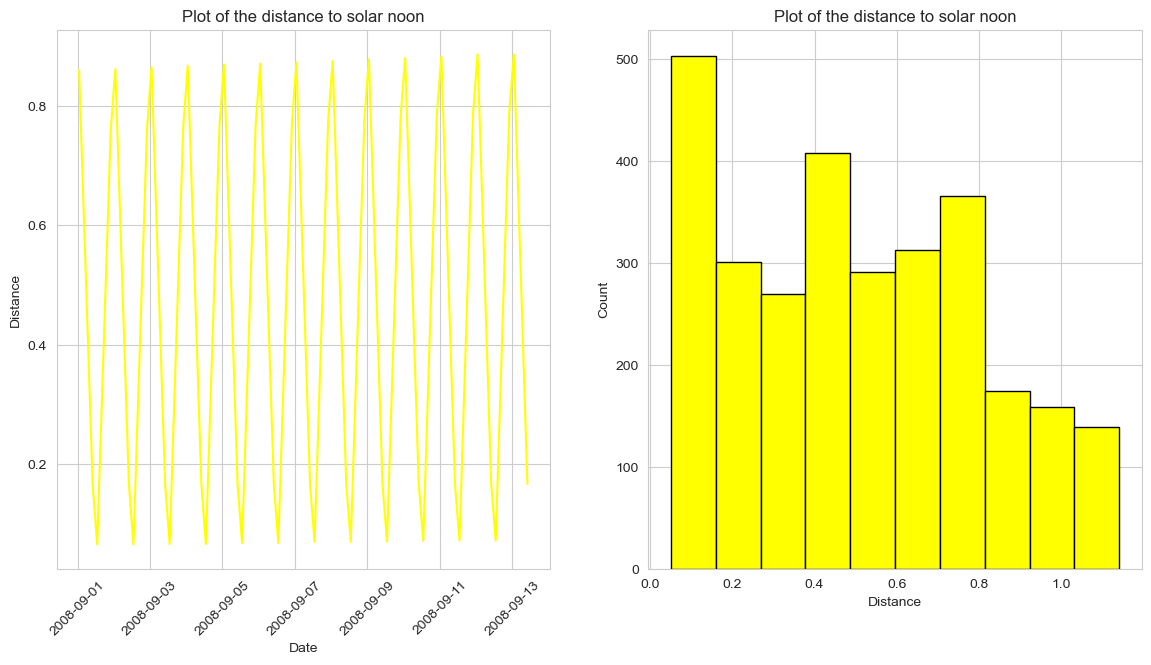

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
#Investigating further, we understand its varying a lot, thus yielding the plot above
ax[0].plot(date_range[:100], dist_sol[:100], color = "yellow")
ax[0].set_title("Plot of the distance to solar noon")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Distance")
ax[0].tick_params(axis='x', labelrotation=45)

#Maybe it is more interesting to visualize this with a barplot
ax[1].hist(dist_sol, color="yellow", edgecolor = "black")
ax[1].set_title("Plot of the distance to solar noon")
ax[1].set_xlabel("Distance")
ax[1].set_ylabel("Count")

### Average temperature (Day)

Text(0, 0.5, 'Temperature')

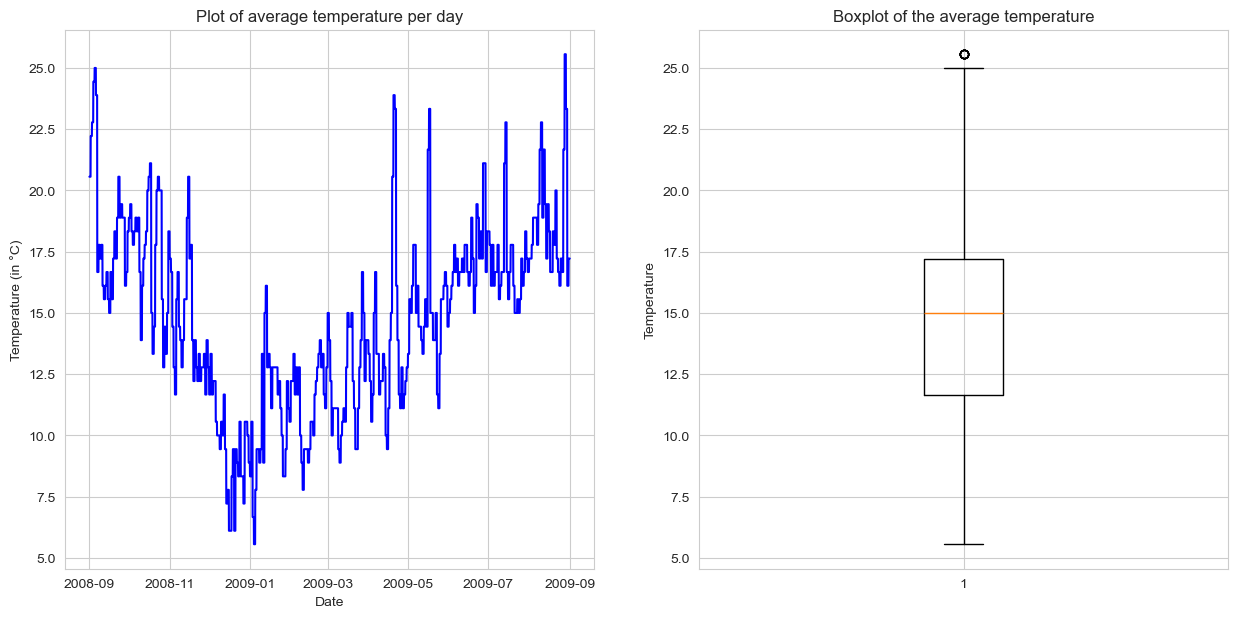

In [9]:
#Graph and boxplot for the variable average temperature
avg_temp = data["Average Temperature (Day)"]

fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(date_range, avg_temp, color = "blue")     
ax[0].set_title("Plot of average temperature per day")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Temperature (in °C)")

ax[1].boxplot(avg_temp)
ax[1].set_title("Boxplot of the average temperature")
ax[1].set_xlabel("")
ax[1].set_ylabel("Temperature")

### Average Wind Direction (Day)

Average Wind Direction (Day)
27    528
29    496
28    464
30    288
26    216
32     88
14     64
31     56
20     56
13     48
23     40
12     40
17     40
18     40
15     40
16     40
21     40
22     32
10     32
7      24
4      24
3      24
6      24
24     24
9      24
33     16
34     16
36     16
25     16
19     16
5      16
1       8
11      8
8       8
2       8
Name: count, dtype: int64

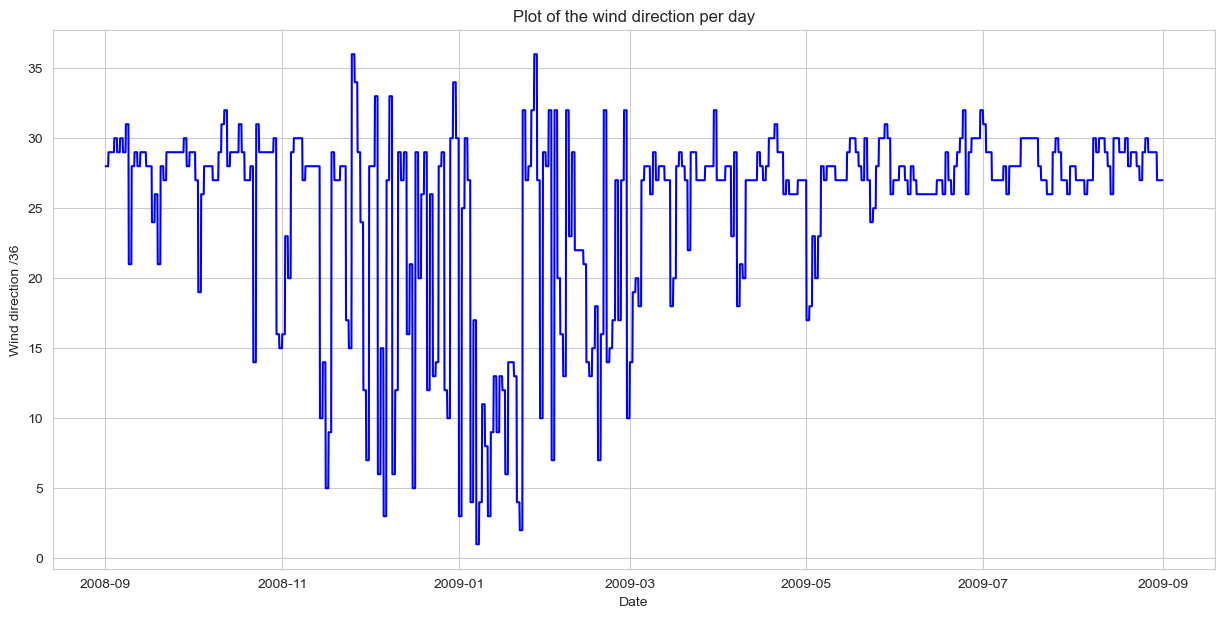

In [14]:
#Average Wind Direction (Day)
avg_wind_dir = data["Average Wind Direction (Day)"]

plt.figure(figsize=(15,7))

plt.plot(date_range, avg_wind_dir, color = "blue")     
plt.title("Plot of the wind direction per day")
plt.xlabel("Date")
plt.ylabel("Wind direction /36")

avg_wind_dir.value_counts()

### Average Barometric Pressure (Period)

Text(0, 0.5, '')

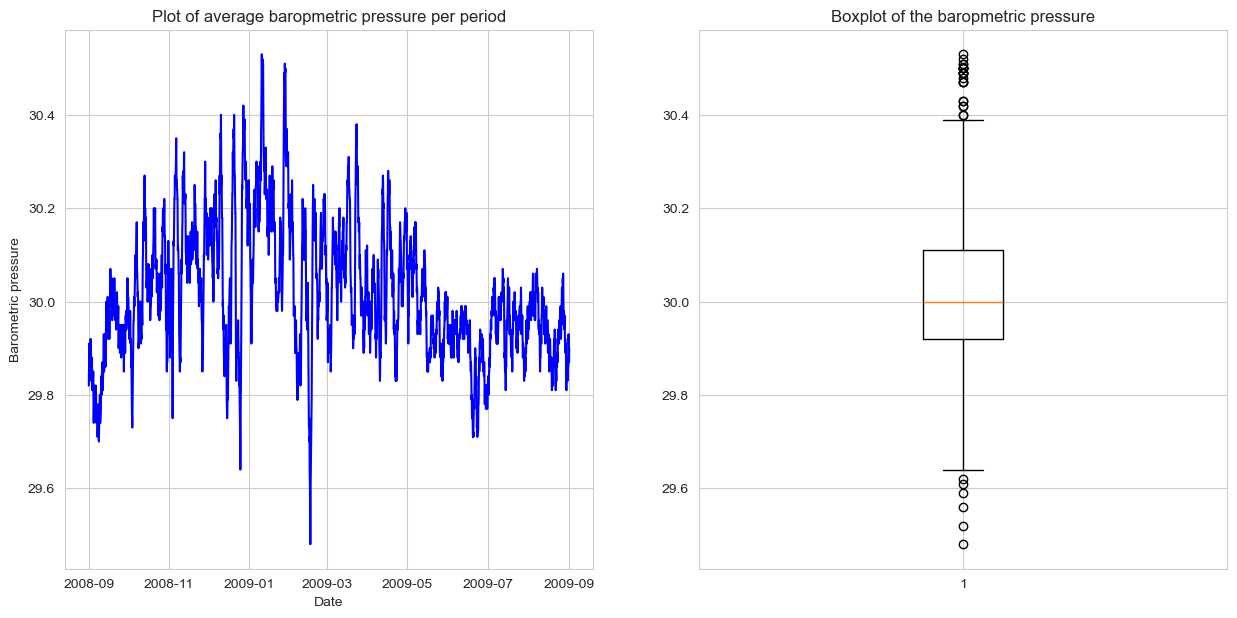

In [ ]:
#Graph and boxplot for the variable average pressure
avg_press = data["Average Barometric Pressure (Period)"]

fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(date_range, avg_press, color = "blue")     
ax[0].set_title("Plot of average baropmetric pressure per period")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Barometric pressure")

ax[1].boxplot(avg_press)
ax[1].set_title("Boxplot of the baropmetric pressure")
ax[1].set_xlabel("")
ax[1].set_ylabel("")

### Power generated

Text(0, 0.5, '')

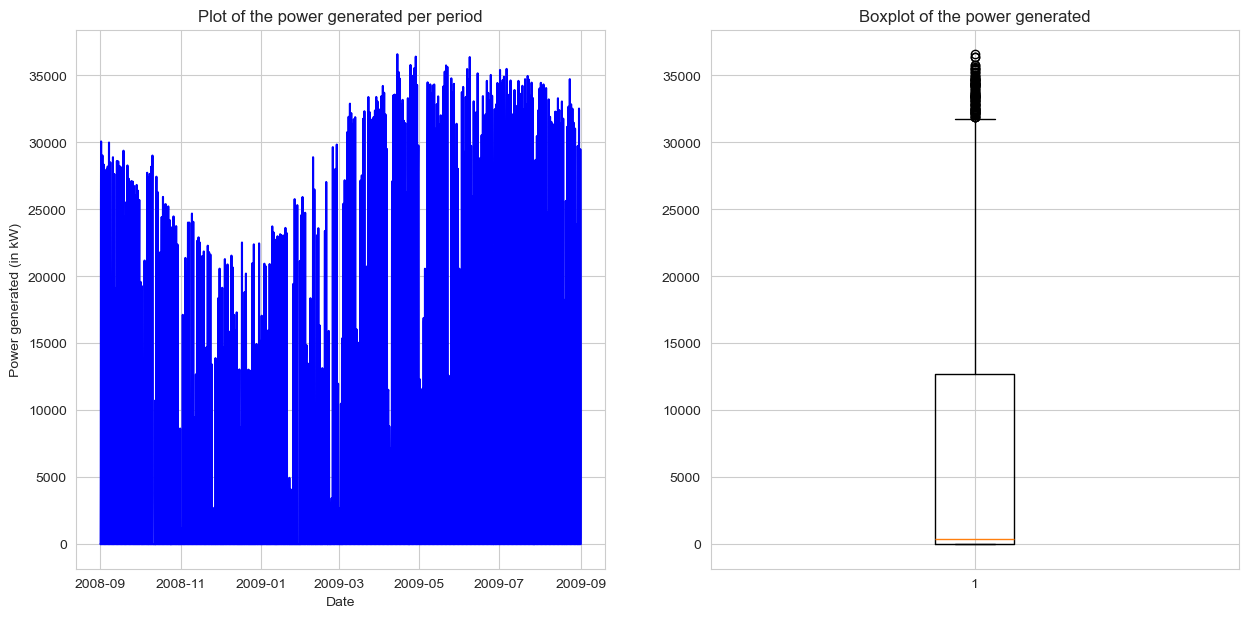

In [18]:
#Our variable of interest!
pow_gen = data["Power Generated"]

fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(date_range, pow_gen, color = "blue")     
ax[0].set_title("Plot of the power generated per period")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Power generated (in kW)")

ax[1].boxplot(pow_gen)
ax[1].set_title("Boxplot of the power generated")
ax[1].set_xlabel("")
ax[1].set_ylabel("")

Text(0.5, 0, 'Power generated')

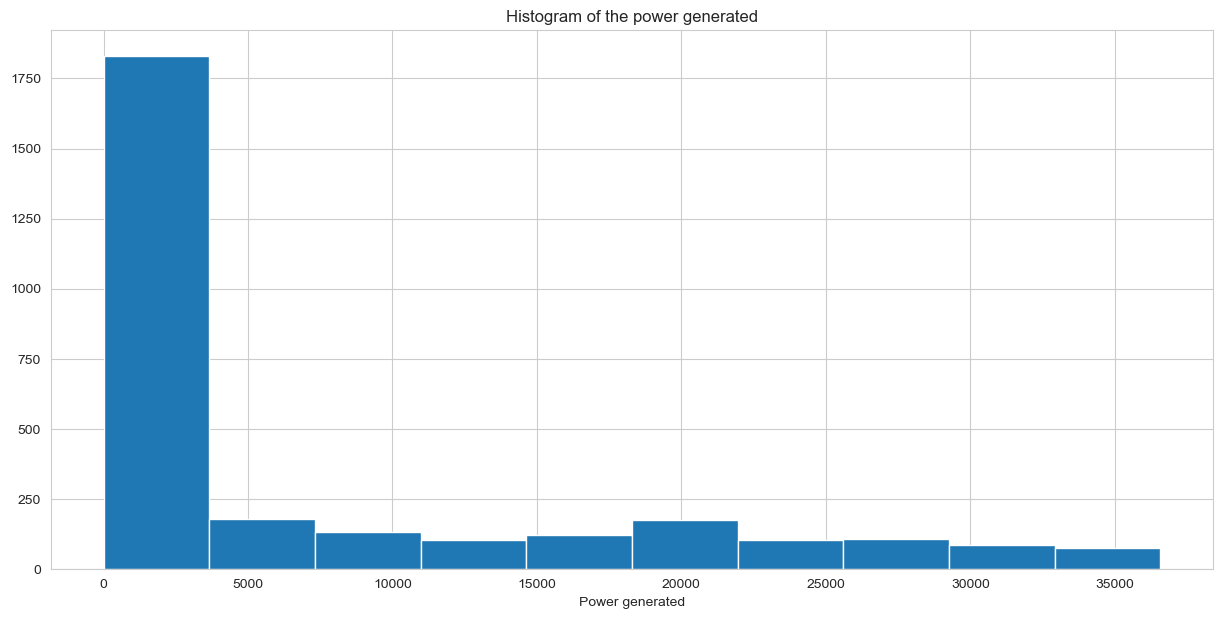

In [ ]:
#The histogram
plt.figure(figsize=(15,7))
plt.hist(pow_gen)
plt.title("Histogram of the power generated")
plt.xlabel("Power generated")

It seems we have a lot of data where the power generated is 0, heavily influencing the mean etc.

Maybe it could be interesting to remove all those values to focus on the data where we actually observe power generation from the power plant

In [ ]:
#Checking if no daylight is logically correlated with no power production
data[(data["Is Daylight"] == False)&(data["Power Generated"] != 0)] #empty data frame

#(data[(data["Is Daylight"] == False)]["Power Generated"] != 0).any()         => another way of checking

,Day of Year,datetime,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated


In [ ]:
#Do we also have data with daylight but no power production? =>
data[(data["Is Daylight"] == True)&(data["Power Generated"] == 0)]

,Day of Year,datetime,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
150,263,2008-09-19 19:00:00,True,0.567347,17.22,21,7.3,4,10.0,81,11.0,29.98,0
214,271,2008-09-27 19:00:00,True,0.586592,18.89,29,9.1,0,10.0,73,15.0,29.89,0
222,272,2008-09-28 19:00:00,True,0.589060,16.11,30,12.3,1,10.0,87,11.0,29.93,0
238,274,2008-09-30 19:00:00,True,0.594633,18.33,29,6.9,1,10.0,68,15.0,29.99,0
254,276,2008-10-02 19:00:00,True,0.598862,19.44,27,9.5,3,10.0,87,13.0,29.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2521,194,2009-07-13 04:00:00,True,0.568156,21.11,28,10.6,1,10.0,86,6.0,30.00,0
2529,195,2009-07-14 04:00:00,True,0.568156,22.78,30,10.4,1,10.0,72,6.0,29.85,0
2635,208,2009-07-27 10:00:00,True,0.159251,16.11,29,14.2,1,10.0,70,14.0,29.95,0
2818,231,2009-08-19 07:00:00,True,0.387376,18.33,30,8.6,4,10.0,84,0.0,29.85,0


In [29]:
#It might still be interesting to keep the data where there is daylight but no power production. That way, we could see what other, less obvious reasons than no daylight, might 
#yield no power production 
data_daylight = data[data["Is Daylight"] == True].drop("Is Daylight", axis=1)
data_daylight.head()

,Day of Year,datetime,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2,245,2008-09-01 07:00:00,0.397172,20.56,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008-09-01 10:00:00,0.165810,20.56,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008-09-01 13:00:00,0.065553,20.56,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008-09-01 16:00:00,0.296915,20.56,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008-09-01 19:00:00,0.528278,20.56,28,7.5,0,10.0,36,15.0,29.83,515


Text(0, 0.5, '')

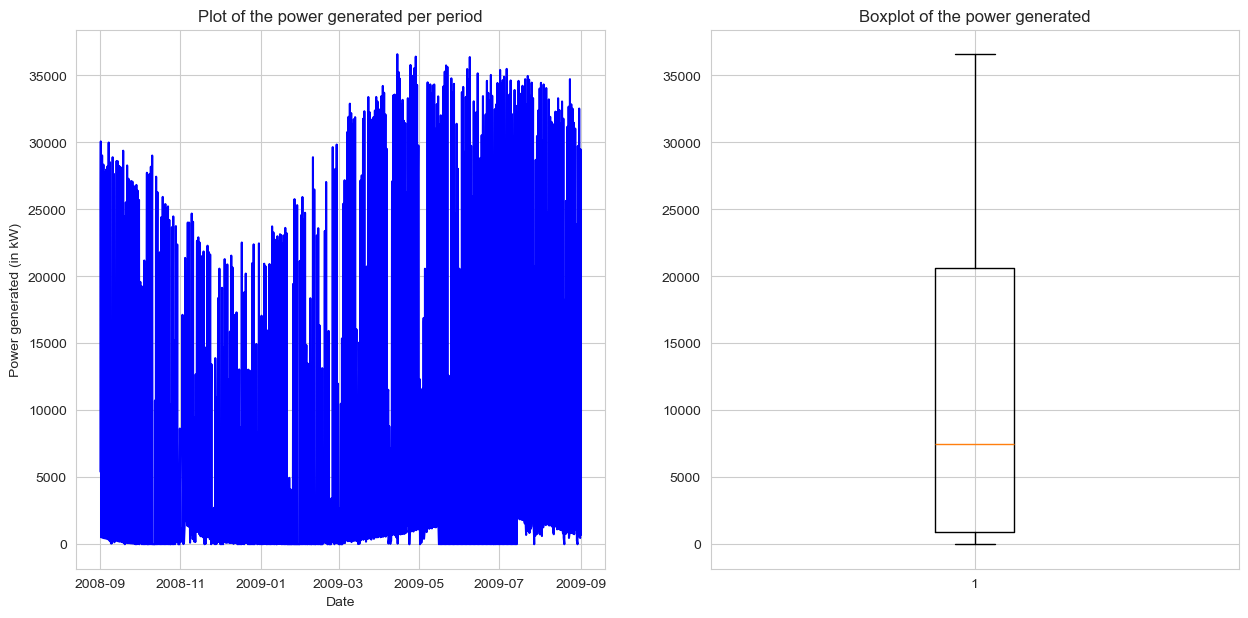

In [31]:
#Try the plots again
pow_gen_daylight = data_daylight["Power Generated"]

fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(data_daylight["datetime"], pow_gen_daylight, color = "blue")     
ax[0].set_title("Plot of the power generated per period")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Power generated (in kW)")

ax[1].boxplot(pow_gen_daylight)
ax[1].set_title("Boxplot of the power generated")
ax[1].set_xlabel("")
ax[1].set_ylabel("")

Text(0.5, 0, 'Power generated')

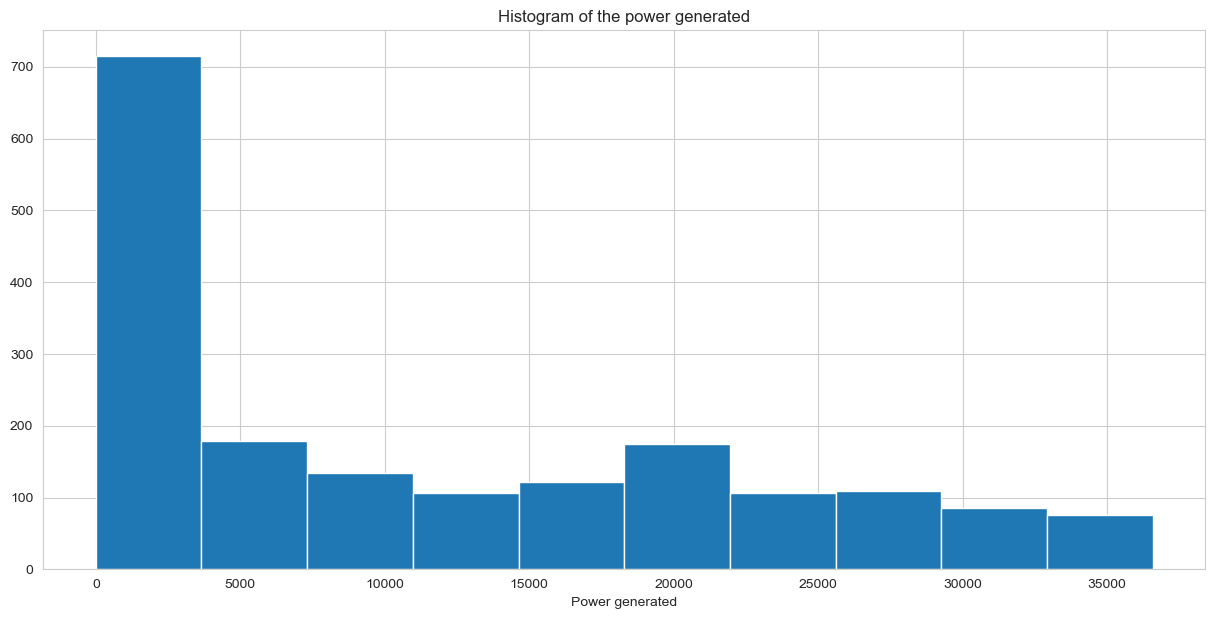

In [32]:
#The histogram
plt.figure(figsize=(15,7))
plt.hist(pow_gen_daylight)
plt.title("Histogram of the power generated")
plt.xlabel("Power generated")

As we can see, there are still a lot of entries where the power generated is 0

## Data analysis 

<Axes: >

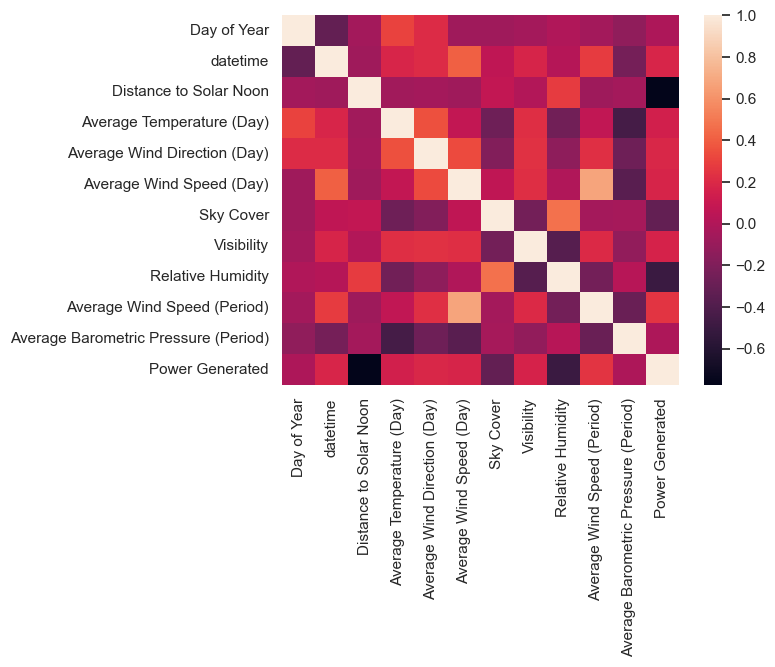

In [ ]:
#Let's try and see if there are any correlated variables
corr_mat = data_daylight.corr()

sns.set_theme()
sns.heatmap(corr_mat)

#We are interested in the variables strongly correlated with the Power Generated data ; 
#As we can see, Distance to solar noon is strongly negatively correlated with the Power Generated ; maybe it could explain the 0 power production in our data ?

In [ ]:
#Checking the means of the distance to solar noon for 0 power generated and above 0 power generated
print(data_daylight[data_daylight["Power Generated"] == 0]["Distance to Solar Noon"].mean())
print(data_daylight[data_daylight["Power Generated"] != 0]["Distance to Solar Noon"].mean())

0.5213210152536586
0.282472112725625


We observe that the mean for the distance to solar noon looks smaller in the case of generated power than in the case of 0 power. Further investigation on the significance of this difference will be conducted on RStudio

In [42]:
data_daylight.head()

,Day of Year,datetime,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
2,245,2008-09-01 07:00:00,0.397172,20.56,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008-09-01 10:00:00,0.165810,20.56,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008-09-01 13:00:00,0.065553,20.56,28,7.5,0,10.0,21,3.0,29.89,30069
5,245,2008-09-01 16:00:00,0.296915,20.56,28,7.5,0,10.0,20,23.0,29.85,16280
6,245,2008-09-01 19:00:00,0.528278,20.56,28,7.5,0,10.0,36,15.0,29.83,515


<Axes: title={'center': 'Power generated according to the variable\ndistance to solar noon'}, xlabel='Distance to Solar Noon', ylabel='Power Generated'>

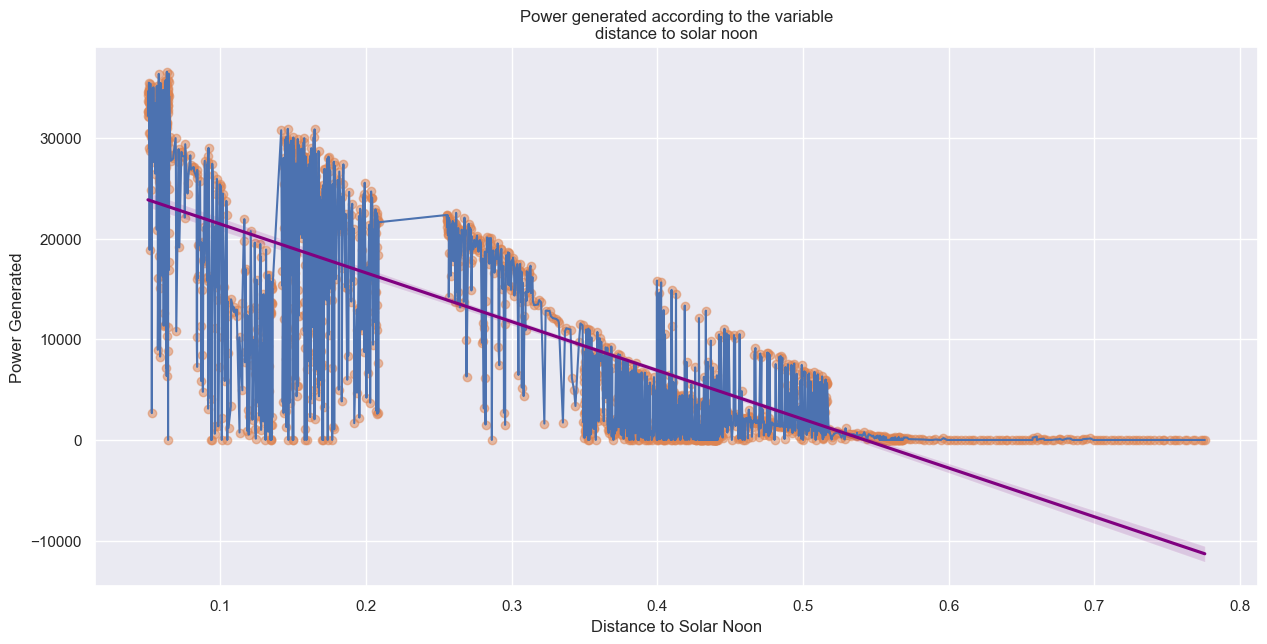

In [49]:
#Linear regression
sorted_dist_sol, sorted_pow_gen = data_daylight.sort_values(by="Distance to Solar Noon")["Distance to Solar Noon"], data_daylight.sort_values(by="Distance to Solar Noon")["Power Generated"]

plt.figure(figsize=(15,7))
plt.plot(sorted_dist_sol, sorted_pow_gen)
plt.title("Power generated according to the variable\ndistance to solar noon")
plt.xlabel("Distance to solar noon")
plt.ylabel("Power generated")
sns.regplot(x=sorted_dist_sol, y=sorted_pow_gen, scatter_kws={'alpha':0.5}, line_kws={'color':'purple'})

We notice that after 0.51 in distance to solar noon, the power generated is always close to 0